In [4]:
# Importa as bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, roc_auc_score, f1_score, recall_score
from sklearn.model_selection import GridSearchCV

import warnings

In [5]:
# Importa a primeira base de dados
df_red = pd.read_csv("winequality-red.csv", sep=";")
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
# Importa a segunda base de dados
df_white = pd.read_csv("winequality-white.csv", sep=";")
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


#Data Preparation

In [7]:
# Adiciona o tipo do vinho as bases carregadas
df_red['type'] = 'red'
df_white['type'] = 'white'

In [8]:
# Une as bases de dados
df = pd.concat([df_red, df_white]).reset_index(drop=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [9]:
# Padroniza o titulo das colunas
df.columns = df.columns.str.title()

In [10]:
# Confere se há valores que necessitam tratamento
df.isnull().sum()

Fixed Acidity           0
Volatile Acidity        0
Citric Acid             0
Residual Sugar          0
Chlorides               0
Free Sulfur Dioxide     0
Total Sulfur Dioxide    0
Density                 0
Ph                      0
Sulphates               0
Alcohol                 0
Quality                 0
Type                    0
dtype: int64

In [11]:
# Codifica a variável Type
label_encoder = LabelEncoder()
df['Type'] = label_encoder.fit_transform(df['Type'])
df

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,Ph,Sulphates,Alcohol,Quality,Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [12]:
# Torna o problema multinomial em binomial
df['Rating'] = np.where(df['Quality'] >= 6, 1, 0)
df

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,Ph,Sulphates,Alcohol,Quality,Type,Rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,1


#Exploratory Data Analysis

In [13]:
# Resumo da base de dados
df.describe()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,Ph,Sulphates,Alcohol,Quality,Type,Rating
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886,0.633061
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779,0.482007
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000,1.000000


In [14]:
# Exibe a quantidade de vinhos por nota
df['Quality'].value_counts()

Quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [15]:
# Soma da quantidade de vinhos por avaliação
df['Rating'].value_counts()

Rating
1    4113
0    2384
Name: count, dtype: int64

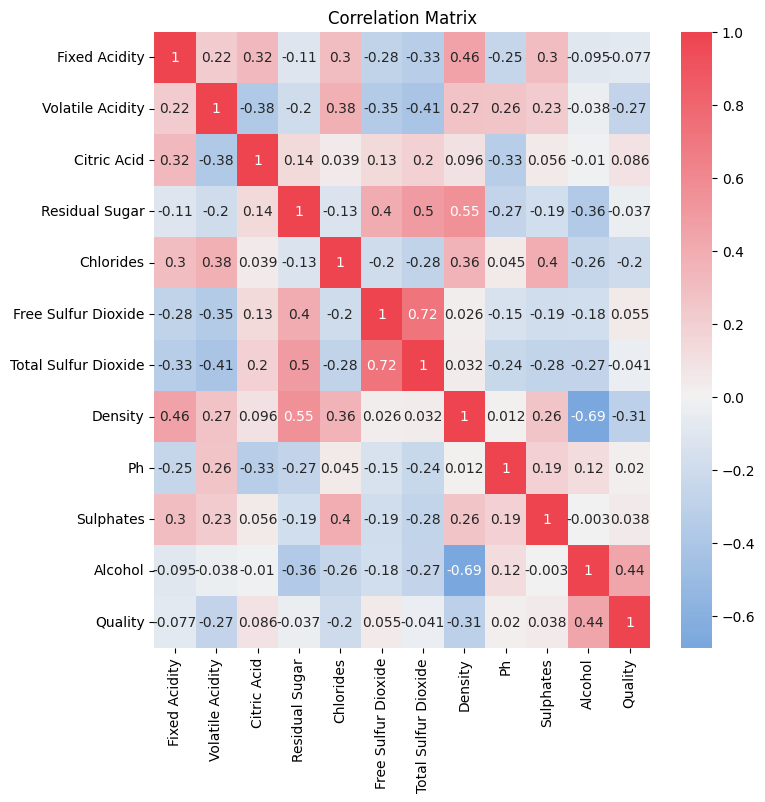

In [16]:
# Plota uma matriz de correlação
corr_mat = df.drop(['Type', 'Rating'], axis=1).corr()
plt.figure(figsize=(8,8))
cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)
sns.heatmap(corr_mat,annot=True, cmap=cmap, center=0)

plt.title('Correlation Matrix')

# Salvar o gráfico como um arquivo de imagem
plt.savefig("correlation_plot.png", dpi=300, bbox_inches='tight')

plt.show()

In [17]:
# Seta a paleta de cores em verde e vermelho
sns.set_palette(["#ff0000","#006400"])

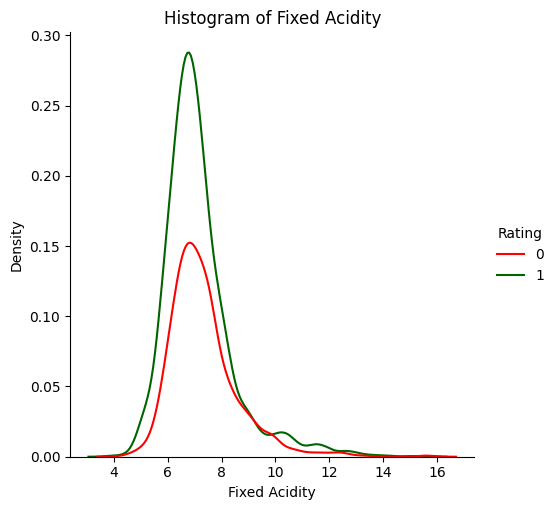

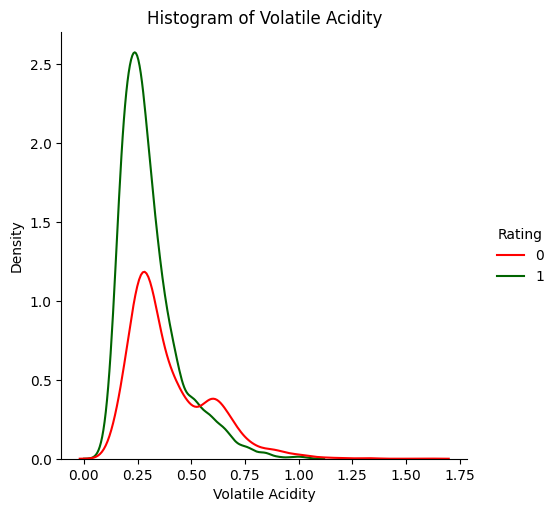

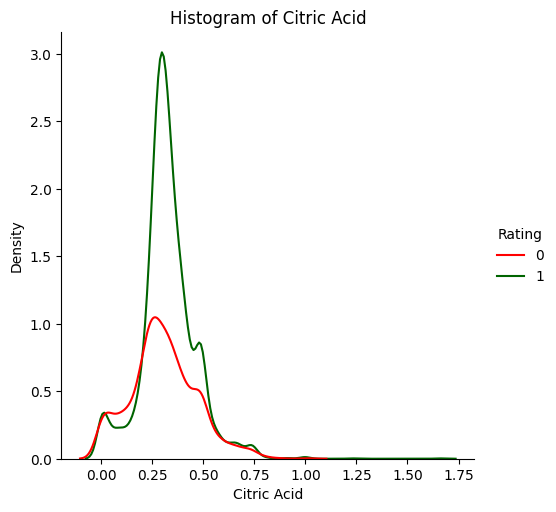

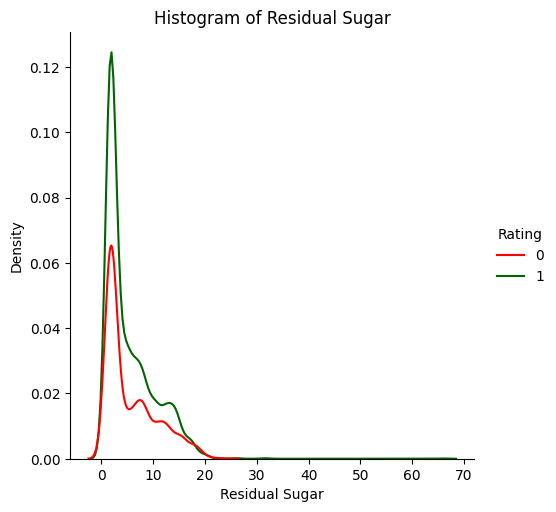

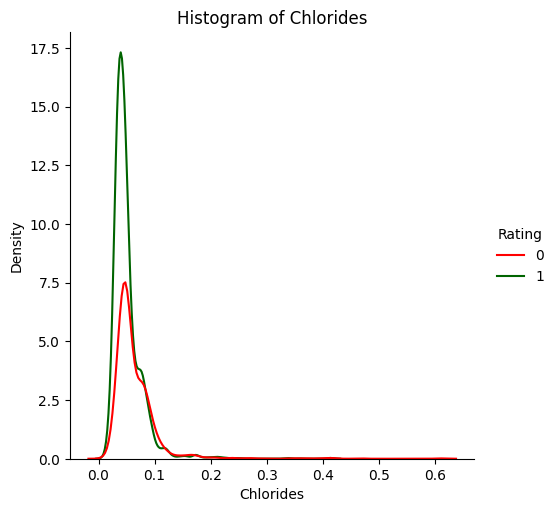

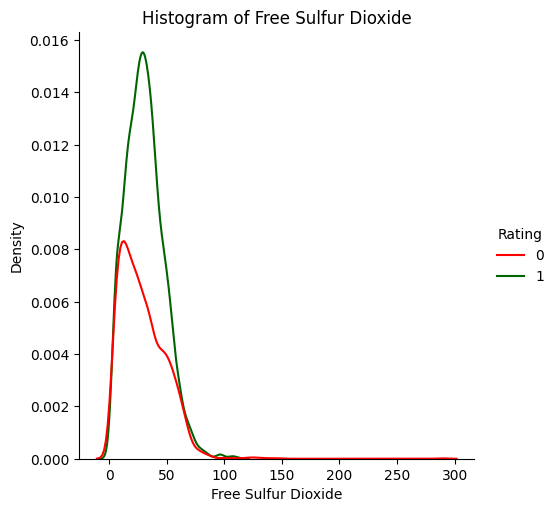

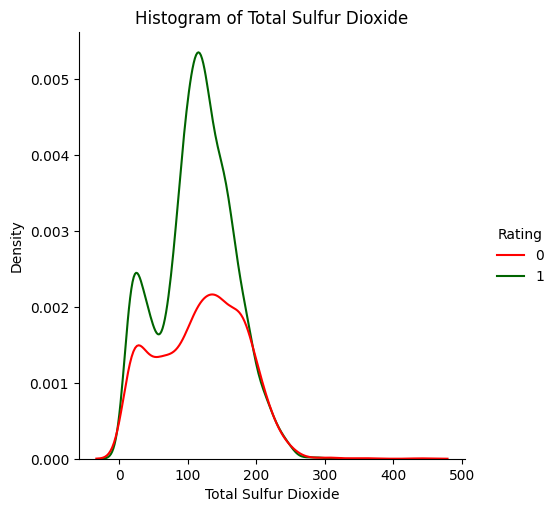

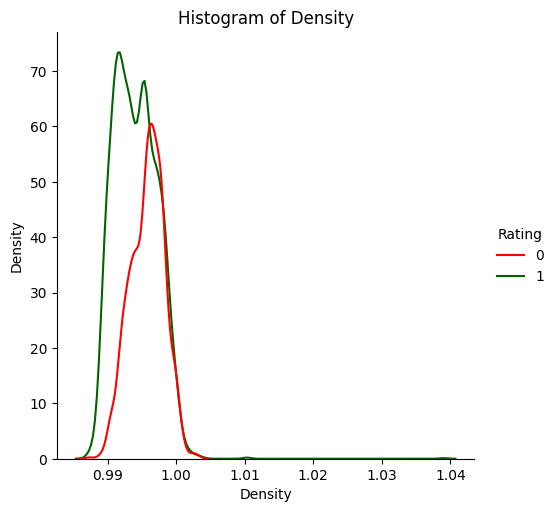

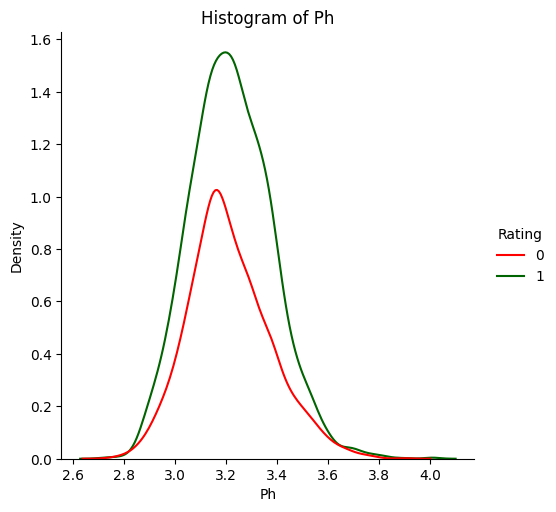

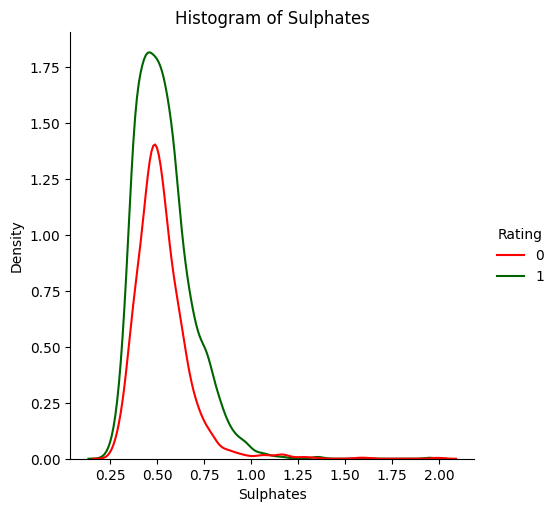

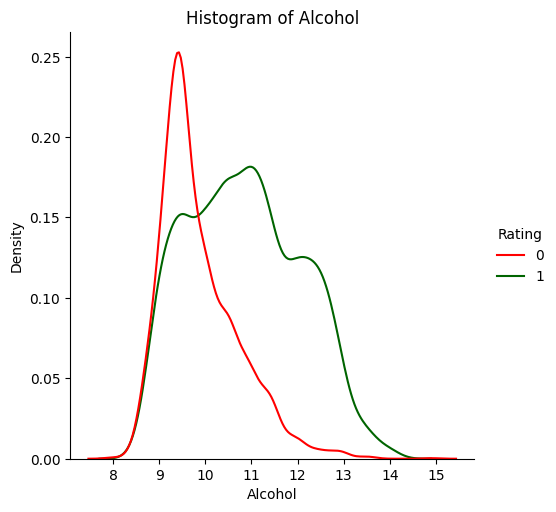

In [22]:
# Plota um histograma para cada variável explicativa

for column in df.columns[:-3]:
  sns.displot(df, x=column, hue="Rating", kind="kde")

  plt.title(f'Histogram of {column}')

  # Salvar o gráfico como um arquivo de imagem
  plt.savefig(f"histogram_{column}.png", dpi=300, bbox_inches='tight')

  plt.show()

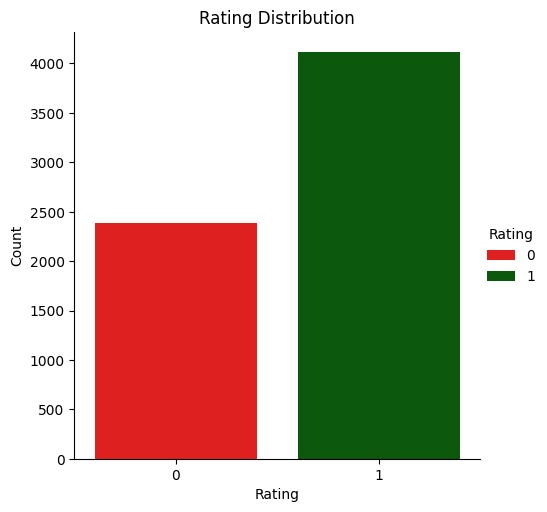

In [24]:
# Distribuição da variável resposta binomial

sns.catplot(data=df, x="Rating", kind="count", hue='Rating')

plt.ylabel('Count')
plt.title('Rating Distribution')

# Salvar o gráfico como um arquivo de imagem
plt.savefig("rating_distribution.png", dpi=300, bbox_inches='tight')

plt.show()

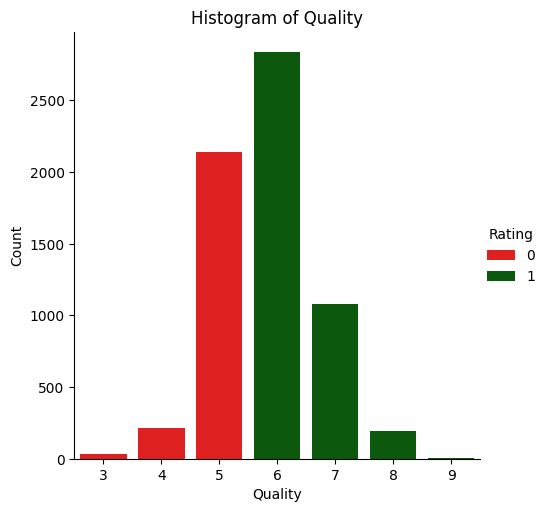

In [25]:
# Distribuição da variável resposta multinomial

sns.catplot(data=df, x="Quality", kind="count", hue='Rating')

plt.ylabel('Count')
plt.title('Histogram of Quality')

# Salvar o gráfico como um arquivo de imagem
plt.savefig("histogram_quality.png", dpi=300, bbox_inches='tight')

plt.show()

In [26]:
# Plot da distribuição entre todas as variáveis

sns.pairplot(data=df, hue="Rating")

# Salvar o gráfico como um arquivo de imagem
plt.savefig("relation_between_columns.png", dpi=300, bbox_inches='tight')

plt.show()

Output hidden; open in https://colab.research.google.com to view.

#Features Selection

In [27]:
# Criação dos df X e Y
df_x = df.drop(['Quality','Rating'], axis=1)
df_y = df['Rating']

In [28]:
# df 1 contem todas as variáveis
df_x_1 = df_x

In [29]:
# df 2 contem as variaveis com correlação com a qualidade dos vinhos
df_x_2 = df_x[['Alcohol','Density','Chlorides','Volatile Acidity']]

In [30]:
# df 3 contem todas as variáveis menos as que possuem correlação entre si
df_x_3 = df_x.drop(['Total Sulfur Dioxide','Residual Sugar','Fixed Acidity'], axis=1)

#Scaling

In [31]:
# Escalona as variáveis X com o metodo Standard

scaler_Standard = StandardScaler()
df_x_1_Standard_scaled = scaler_Standard.fit_transform(df_x_1)
df_x_2_Standard_scaled = scaler_Standard.fit_transform(df_x_2)
df_x_3_Standard_scaled = scaler_Standard.fit_transform(df_x_3)

# Divide os dados em treino e teste (70/30)

x_train_1_Standard_scaled, x_test_1_Standard_scaled, y_train_1, y_test_1 = train_test_split(df_x_1_Standard_scaled, df_y, test_size=0.3, random_state=123)
x_train_2_Standard_scaled, x_test_2_Standard_scaled, y_train_2, y_test_2 = train_test_split(df_x_2_Standard_scaled, df_y, test_size=0.3, random_state=123)
x_train_3_Standard_scaled, x_test_3_Standard_scaled, y_train_3, y_test_3 = train_test_split(df_x_3_Standard_scaled, df_y, test_size=0.3, random_state=123)

In [32]:
# Escalona as variáveis X com o metodo MinMax

scaler_MinMax = MinMaxScaler()
df_x_1_MinMax_scaled = scaler_MinMax.fit_transform(df_x_1)
df_x_2_MinMax_scaled = scaler_MinMax.fit_transform(df_x_2)
df_x_3_MinMax_scaled = scaler_MinMax.fit_transform(df_x_3)

# Divide os dados em treino e teste (70/30)

x_train_1_MinMax_scaled, x_test_1_MinMax_scaled, y_train_1, y_test_1 = train_test_split(df_x_1_MinMax_scaled, df_y, test_size=0.3, random_state=123)
x_train_2_MinMax_scaled, x_test_2_MinMax_scaled, y_train_2, y_test_2 = train_test_split(df_x_2_MinMax_scaled, df_y, test_size=0.3, random_state=123)
x_train_3_MinMax_scaled, x_test_3_MinMax_scaled, y_train_3, y_test_3 = train_test_split(df_x_3_MinMax_scaled, df_y, test_size=0.3, random_state=123)

In [33]:
# Dividade os dados em treino e teste (70/30) sem escalonamento

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(df_x_1, df_y, test_size=0.3, random_state=123)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(df_x_2, df_y, test_size=0.3, random_state=123)
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(df_x_3, df_y, test_size=0.3, random_state=123)

#Modeling

In [49]:
metrics = pd.DataFrame(columns=['Model', 'Features', 'Scaled', 'MSE', 'Accuracy', 'F1', 'Recall', 'AUC'])

## Logistic Regression

In [35]:
# Criação dos modelos de regressão logística

from sklearn.linear_model import LogisticRegression

def logistic_regression(x_train, y_train, x_test, y_test, features, scaled):

  grid_logistic_regression = {}

  param_grid = {'C': [0.1, 1, 10, 100],
                'penalty': ['l1', 'l2'],
                'solver': ['saga', 'liblinear']}

  logistic_regression = LogisticRegression(random_state=123)

  grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='recall')

  grid_search.fit(x_train, y_train)

  best_model = grid_search.best_estimator_

  y_pred = best_model.predict(x_test)

  mse = round(mean_squared_error(y_test, y_pred), 4)
  acc = round(accuracy_score(y_test, y_pred), 4)
  f1 = round(f1_score(y_test, y_pred), 4)
  recall = round(recall_score(y_test, y_pred), 4)
  auc = round(roc_auc_score(y_test, y_pred), 4)

  metrics.loc[len(metrics)] = ['Logistic Regression', features, scaled, mse, acc, f1, recall, auc]

  return best_model

In [36]:
# Treinamento e teste dos modelos de regressão logística

warnings.filterwarnings("ignore", category=ConvergenceWarning)

logistic_regression_1_notScaled = logistic_regression(x_train_1, y_train_1, x_test_1, y_test_1, 'X1', 'Not')
logistic_regression_2_notScaled = logistic_regression(x_train_2, y_train_2, x_test_2, y_test_2, 'X2', 'Not')
logistic_regression_3_notScaled = logistic_regression(x_train_3, y_train_3, x_test_3, y_test_3, 'X3', 'Not')

logistic_regression_1_MinMax_Scaled = logistic_regression(x_train_1_MinMax_scaled, y_train_1, x_test_1_MinMax_scaled, y_test_1, 'X1', 'MinMax')
logistic_regression_2_MinMax_Scaled = logistic_regression(x_train_2_MinMax_scaled, y_train_2, x_test_2_MinMax_scaled, y_test_2, 'X2', 'MinMax')
logistic_regression_3_MinMax_Scaled = logistic_regression(x_train_3_MinMax_scaled, y_train_3, x_test_3_MinMax_scaled, y_test_3, 'X3', 'MinMax')

logistic_regression_1_Standard_Scaled = logistic_regression(x_train_1_Standard_scaled, y_train_1, x_test_1_Standard_scaled, y_test_1, 'X1', 'Standard')
logistic_regression_2_Standard_Scaled = logistic_regression(x_train_2_Standard_scaled, y_train_2, x_test_2_Standard_scaled, y_test_2, 'X2', 'Standard')
logistic_regression_3_Standard_Scaled = logistic_regression(x_train_3_Standard_scaled, y_train_3, x_test_3_Standard_scaled, y_test_3, 'X3', 'Standard')

In [37]:
# Obtém os coeficientes do melhor modelo de regressão logística para variáveis não escalonadas
coefficients = pd.DataFrame({'Feature': df_x.columns,
                             'Coefficient': logistic_regression_1_notScaled.coef_[0]})

significant_coefficients_notScaled = coefficients[(coefficients['Coefficient'] > 0.05) | (coefficients['Coefficient'] < -0.05)].reset_index(drop=True)['Feature'].values

# Obtém os coeficientes do melhor modelo de regressão logística para variáveis escalonadas pelo método "MinMax"
coefficients = pd.DataFrame({'Feature': df_x.columns,
                             'Coefficient': logistic_regression_1_MinMax_Scaled.coef_[0]})

significant_coefficients_MinMax_Scaled = coefficients[(coefficients['Coefficient'] > 0.05) | (coefficients['Coefficient'] < -0.05)].reset_index(drop=True)['Feature'].values

# Obtém os coeficientes do melhor modelo de regressão logística para variáveis escalonadas pelo método "Standard"
coefficients = pd.DataFrame({'Feature': df_x.columns,
                             'Coefficient': logistic_regression_1_Standard_Scaled.coef_[0]})

significant_coefficients_Standard_Scaled = coefficients[(coefficients['Coefficient'] > 0.05) | (coefficients['Coefficient'] < -0.05)].reset_index(drop=True)['Feature'].values

In [38]:
# Criação do quarto grupo de variáveis e divisão em treino e teste

df_x_4 = df[significant_coefficients_notScaled]
x_train_4, x_test_4, y_train_4, y_test_4 = train_test_split(df_x_4, df_y, test_size=0.3, random_state=123)

df_x_4_MinMax_scaled = df[significant_coefficients_MinMax_Scaled]
df_x_4_MinMax_scaled = scaler_MinMax.fit_transform(df_x_4_MinMax_scaled)
x_train_4_MinMax_scaled, x_test_4_MinMax_scaled, y_train_4, y_test_4 = train_test_split(df_x_4_MinMax_scaled, df_y, test_size=0.3, random_state=123)

df_x_4_Standard_scaled = df[significant_coefficients_Standard_Scaled]
df_x_4_Standard_scaled = scaler_Standard.fit_transform(df_x_4_Standard_scaled)
x_train_4_Standard_scaled, x_test_4_Standard_scaled, y_train_4, y_test_4 = train_test_split(df_x_4_Standard_scaled, df_y, test_size=0.3, random_state=123)

In [39]:
# Treinamento e teste dos modelos de regressão logística com o novo grupo de variáveis

warnings.filterwarnings("ignore", category=ConvergenceWarning)

logistic_regression_4_notScaled = logistic_regression(x_train_4, y_train_4, x_test_4, y_test_4, 'X4', 'Not')
logistic_regression_4_MinMax_Scaled = logistic_regression(x_train_4_MinMax_scaled, y_train_4, x_test_4_MinMax_scaled, y_test_4, 'X4', 'MinMax')
logistic_regression_4_Standard_Scaled = logistic_regression(x_train_4_Standard_scaled, y_train_4, x_test_4_Standard_scaled, y_test_4, 'X4', 'Standard')

metrics

,Model,Features,Scaled,MSE,Accuracy,F1,Recall,AUC
0,Logistic Regression,X1,Not,0.3477,0.6523,0.7708,0.9291,0.5558
1,Logistic Regression,X2,Not,0.2672,0.7328,0.8074,0.8900,0.6780
2,Logistic Regression,X3,Not,0.3713,0.6287,0.7720,0.9992,0.4996
3,Logistic Regression,X1,MinMax,0.2810,0.7190,0.7970,0.8769,0.6639
4,Logistic Regression,X2,MinMax,0.2846,0.7154,0.7931,0.8672,0.6625
5,Logistic Regression,X3,MinMax,0.2831,0.7169,0.7951,0.8729,0.6626
6,Logistic Regression,X1,Standard,0.2554,0.7446,0.8059,0.8427,0.7104
7,Logistic Regression,X2,Standard,0.2605,0.7395,0.8026,0.8419,0.7038
8,Logistic Regression,X3,Standard,0.2615,0.7385,0.8003,0.8329,0.7055
9,Logistic Regression,X4,Not,0.2728,0.7272,0.7973,0.8525,0.6835


##SVC

In [37]:
# Criação dos modelos SVC

from sklearn.svm import SVC

def svc(x_train, y_train, x_test, y_test, features, scaled):

  grid_SVC = {}

  param_grid = {'C': [0.1, 1, 10, 100]}

  svc = SVC(random_state=123)

  grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='recall')

  grid_search.fit(x_train, y_train)

  best_model = grid_search.best_estimator_

  y_pred = best_model.predict(x_test)

  mse = round(mean_squared_error(y_test, y_pred), 4)
  acc = round(accuracy_score(y_test, y_pred), 4)
  f1 = round(f1_score(y_test, y_pred), 4)
  recall = round(recall_score(y_test, y_pred), 4)
  auc = round(roc_auc_score(y_test, y_pred), 4)

  metrics.loc[len(metrics)] = ['SVC', features, scaled, mse, acc, f1, recall, auc]

  return best_model

In [38]:
# Treinamento e teste dos modelos SVC

warnings.filterwarnings("ignore", category=ConvergenceWarning)

svc_1_notScaled = svc(x_train_1, y_train_1, x_test_1, y_test_1, 'X1', 'Not')
svc_2_notScaled = svc(x_train_2, y_train_2, x_test_2, y_test_2, 'X2', 'Not')
svc_3_notScaled = svc(x_train_3, y_train_3, x_test_3, y_test_3, 'X3', 'Not')
svc_4_notScaled = svc(x_train_4, y_train_4, x_test_4, y_test_4, 'X4', 'Not')

svc_1_MinMax_Scaled = svc(x_train_1_MinMax_scaled, y_train_1, x_test_1_MinMax_scaled, y_test_1, 'X1', 'MinMax')
svc_2_MinMax_Scaled = svc(x_train_2_MinMax_scaled, y_train_2, x_test_2_MinMax_scaled, y_test_2, 'X2', 'MinMax')
svc_3_MinMax_Scaled = svc(x_train_3_MinMax_scaled, y_train_3, x_test_3_MinMax_scaled, y_test_3, 'X3', 'MinMax')
svc_4_MinMax_Scaled = svc(x_train_4_MinMax_scaled, y_train_4, x_test_4_MinMax_scaled, y_test_4, 'X4', 'MinMax')

svc_1_Standard_Scaled = svc(x_train_1_Standard_scaled, y_train_1, x_test_1_Standard_scaled, y_test_1, 'X1', 'Standard')
svc_2_Standard_Scaled = svc(x_train_2_Standard_scaled, y_train_2, x_test_2_Standard_scaled, y_test_2, 'X2', 'Standard')
svc_3_Standard_Scaled = svc(x_train_3_Standard_scaled, y_train_3, x_test_3_Standard_scaled, y_test_3, 'X3', 'Standard')
svc_4_Standard_Scaled = svc(x_train_4_Standard_scaled, y_train_4, x_test_4_Standard_scaled, y_test_4, 'X4', 'Standard')

metrics

,Model,Features,Scaled,MSE,Accuracy,F1,Recall,AUC
0,Logistic Regression,X1,Not,0.3477,0.6523,0.7708,0.9291,0.5558
1,Logistic Regression,X2,Not,0.2672,0.7328,0.8074,0.8900,0.6780
2,Logistic Regression,X3,Not,0.3713,0.6287,0.7720,0.9992,0.4996
3,Logistic Regression,X1,MinMax,0.2810,0.7190,0.7970,0.8769,0.6639
4,Logistic Regression,X2,MinMax,0.2846,0.7154,0.7931,0.8672,0.6625
5,Logistic Regression,X3,MinMax,0.2831,0.7169,0.7951,0.8729,0.6626
6,Logistic Regression,X1,Standard,0.2554,0.7446,0.8059,0.8427,0.7104
7,Logistic Regression,X2,Standard,0.2605,0.7395,0.8026,0.8419,0.7038
8,Logistic Regression,X3,Standard,0.2615,0.7385,0.8003,0.8329,0.7055
9,Logistic Regression,X4,Not,0.2728,0.7272,0.7973,0.8525,0.6835


##Naive Bayes

In [39]:
# Criação dos modelos de Naive Bayes

from sklearn.naive_bayes import GaussianNB

def naive_bayes(x_train, y_train, x_test, y_test, features, scaled):

  param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

  naive_bayes = GaussianNB()

  grid_search = GridSearchCV(estimator=naive_bayes, param_grid=param_grid, cv=5, scoring='recall')

  grid_search.fit(x_train, y_train)

  best_model = grid_search.best_estimator_

  y_pred = best_model.predict(x_test)

  mse = round(mean_squared_error(y_test, y_pred), 4)
  acc = round(accuracy_score(y_test, y_pred), 4)
  f1 = round(f1_score(y_test, y_pred), 4)
  recall = round(recall_score(y_test, y_pred), 4)
  auc = round(roc_auc_score(y_test, y_pred), 4)

  metrics.loc[len(metrics)] = ['Naive Bayes', features, scaled, mse, acc, f1, recall, auc]

  return best_model

In [40]:
# Treinamento e teste dos modelos Naive Bayes

warnings.filterwarnings("ignore", category=ConvergenceWarning)

naive_bayes_1_notScaled = naive_bayes(x_train_1, y_train_1, x_test_1, y_test_1, 'X1', 'Not')
naive_bayes_2_notScaled = naive_bayes(x_train_2, y_train_2, x_test_2, y_test_2, 'X2', 'Not')
naive_bayes_3_notScaled = naive_bayes(x_train_3, y_train_3, x_test_3, y_test_3, 'X3', 'Not')
naive_bayes_4_notScaled = naive_bayes(x_train_4, y_train_4, x_test_4, y_test_4, 'X4', 'Not')

naive_bayes_1_MinMax_Scaled = naive_bayes(x_train_1_MinMax_scaled, y_train_1, x_test_1_MinMax_scaled, y_test_1, 'X1', 'MinMax')
naive_bayes_2_MinMax_Scaled = naive_bayes(x_train_2_MinMax_scaled, y_train_2, x_test_2_MinMax_scaled, y_test_2, 'X2', 'MinMax')
naive_bayes_3_MinMax_Scaled = naive_bayes(x_train_3_MinMax_scaled, y_train_3, x_test_3_MinMax_scaled, y_test_3, 'X3', 'MinMax')
naive_bayes_4_MinMax_Scaled = naive_bayes(x_train_4_MinMax_scaled, y_train_4, x_test_4_MinMax_scaled, y_test_4, 'X4', 'MinMax')

naive_bayes_1_Standard_Scaled = naive_bayes(x_train_1_Standard_scaled, y_train_1, x_test_1_Standard_scaled, y_test_1, 'X1', 'Standard')
naive_bayes_2_Standard_Scaled = naive_bayes(x_train_2_Standard_scaled, y_train_2, x_test_2_Standard_scaled, y_test_2, 'X2', 'Standard')
naive_bayes_3_Standard_Scaled = naive_bayes(x_train_3_Standard_scaled, y_train_3, x_test_3_Standard_scaled, y_test_3, 'X3', 'Standard')
naive_bayes_4_Standard_Scaled = naive_bayes(x_train_4_Standard_scaled, y_train_4, x_test_4_Standard_scaled, y_test_4, 'X4', 'Standard')

metrics

,Model,Features,Scaled,MSE,Accuracy,F1,Recall,AUC
0,Logistic Regression,X1,Not,0.3477,0.6523,0.7708,0.9291,0.5558
1,Logistic Regression,X2,Not,0.2672,0.7328,0.8074,0.8900,0.6780
2,Logistic Regression,X3,Not,0.3713,0.6287,0.7720,0.9992,0.4996
3,Logistic Regression,X1,MinMax,0.2810,0.7190,0.7970,0.8769,0.6639
4,Logistic Regression,X2,MinMax,0.2846,0.7154,0.7931,0.8672,0.6625
5,Logistic Regression,X3,MinMax,0.2831,0.7169,0.7951,0.8729,0.6626
6,Logistic Regression,X1,Standard,0.2554,0.7446,0.8059,0.8427,0.7104
7,Logistic Regression,X2,Standard,0.2605,0.7395,0.8026,0.8419,0.7038
8,Logistic Regression,X3,Standard,0.2615,0.7385,0.8003,0.8329,0.7055
9,Logistic Regression,X4,Not,0.2728,0.7272,0.7973,0.8525,0.6835


##Random Forest

In [40]:
# Criação dos modelos de Random Forest

from sklearn.ensemble import RandomForestClassifier

def random_forest(x_train, y_train, x_test, y_test, features, scaled):

  param_grid = {'n_estimators': [100, 200, 300],
                'max_depth': [10, 20, 30],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]}

  random_forest = RandomForestClassifier(random_state=123)

  grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='recall')

  grid_search.fit(x_train, y_train)

  best_model = grid_search.best_estimator_

  y_pred = best_model.predict(x_test)

  mse = round(mean_squared_error(y_test, y_pred), 4)
  acc = round(accuracy_score(y_test, y_pred), 4)
  f1 = round(f1_score(y_test, y_pred), 4)
  recall = round(recall_score(y_test, y_pred), 4)
  auc = round(roc_auc_score(y_test, y_pred), 4)

  metrics.loc[len(metrics)] = ['Random Forest', features, scaled, mse, acc, f1, recall, auc]

  return best_model

In [41]:
# Treinamento e teste dos modelos de Random Forest

warnings.filterwarnings("ignore", category=ConvergenceWarning)

random_forest_1_notScaled = random_forest(x_train_1, y_train_1, x_test_1, y_test_1, 'X1', 'Not')
random_forest_2_notScaled = random_forest(x_train_2, y_train_2, x_test_2, y_test_2, 'X2', 'Not')
random_forest_3_notScaled = random_forest(x_train_3, y_train_3, x_test_3, y_test_3, 'X3', 'Not')
random_forest_4_notScaled = random_forest(x_train_4, y_train_4, x_test_4, y_test_4, 'X4', 'Not')

random_forest_1_MinMax_Scaled = random_forest(x_train_1_MinMax_scaled, y_train_1, x_test_1_MinMax_scaled, y_test_1, 'X1', 'MinMax')
random_forest_2_MinMax_Scaled = random_forest(x_train_2_MinMax_scaled, y_train_2, x_test_2_MinMax_scaled, y_test_2, 'X2', 'MinMax')
random_forest_3_MinMax_Scaled = random_forest(x_train_3_MinMax_scaled, y_train_3, x_test_3_MinMax_scaled, y_test_3, 'X3', 'MinMax')
random_forest_4_MinMax_Scaled = random_forest(x_train_4_MinMax_scaled, y_train_4, x_test_4_MinMax_scaled, y_test_4, 'X4', 'MinMax')

random_forest_1_Standard_Scaled = random_forest(x_train_1_Standard_scaled, y_train_1, x_test_1_Standard_scaled, y_test_1, 'X1', 'Standard')
random_forest_2_Standard_Scaled = random_forest(x_train_2_Standard_scaled, y_train_2, x_test_2_Standard_scaled, y_test_2, 'X2', 'Standard')
random_forest_3_Standard_Scaled = random_forest(x_train_3_Standard_scaled, y_train_3, x_test_3_Standard_scaled, y_test_3, 'X3', 'Standard')
random_forest_4_Standard_Scaled = random_forest(x_train_4_Standard_scaled, y_train_4, x_test_4_Standard_scaled, y_test_4, 'X4', 'Standard')

metrics

KeyboardInterrupt: 

##Neural Network

In [43]:
# Criação dos modelos de Redes Neurais

from sklearn.neural_network import MLPClassifier

def neural_network(x_train, y_train, x_test, y_test, features, scaled):

  parameters = {'hidden_layer_sizes': [(150,), (150,50), (100,30)],
                'activation': ['relu', 'tanh']}

  NN = MLPClassifier(random_state=123)

  grid_search = GridSearchCV(NN, parameters, cv=5, scoring='recall')

  grid_search.fit(x_train, y_train)

  best_model = grid_search.best_estimator_

  y_pred = best_model.predict(x_test)

  mse = round(mean_squared_error(y_test, y_pred), 4)
  acc = round(accuracy_score(y_test, y_pred), 4)
  f1 = round(f1_score(y_test, y_pred), 4)
  recall = round(recall_score(y_test, y_pred), 4)
  auc = round(roc_auc_score(y_test, y_pred), 4)

  metrics.loc[len(metrics)] = ['Neural Network', features, scaled, mse, acc, f1, recall, auc]

  return best_model

In [44]:
# Treinamento e teste dos modelos de Redes Neurais

warnings.filterwarnings("ignore", category=ConvergenceWarning)

neural_network_1_notScaled = neural_network(x_train_1, y_train_1, x_test_1, y_test_1, 'X1', 'Not')
neural_network_2_notScaled = neural_network(x_train_2, y_train_2, x_test_2, y_test_2, 'X2', 'Not')
neural_network_3_notScaled = neural_network(x_train_3, y_train_3, x_test_3, y_test_3, 'X3', 'Not')
neural_network_4_notScaled = neural_network(x_train_4, y_train_4, x_test_4, y_test_4, 'X4', 'Not')

neural_network_1_MinMax_Scaled = neural_network(x_train_1_MinMax_scaled, y_train_1, x_test_1_MinMax_scaled, y_test_1, 'X1', 'MinMax')
neural_network_2_MinMax_Scaled = neural_network(x_train_2_MinMax_scaled, y_train_2, x_test_2_MinMax_scaled, y_test_2, 'X2', 'MinMax')
neural_network_3_MinMax_Scaled = neural_network(x_train_3_MinMax_scaled, y_train_3, x_test_3_MinMax_scaled, y_test_3, 'X3', 'MinMax')
neural_network_4_MinMax_Scaled = neural_network(x_train_4_MinMax_scaled, y_train_4, x_test_4_MinMax_scaled, y_test_4, 'X4', 'MinMax')

neural_network_1_Standard_Scaled = neural_network(x_train_1_Standard_scaled, y_train_1, x_test_1_Standard_scaled, y_test_1, 'X1', 'Standard')
neural_network_2_Standard_Scaled = neural_network(x_train_2_Standard_scaled, y_train_2, x_test_2_Standard_scaled, y_test_2, 'X2', 'Standard')
neural_network_3_Standard_Scaled = neural_network(x_train_3_Standard_scaled, y_train_3, x_test_3_Standard_scaled, y_test_3, 'X3', 'Standard')
neural_network_4_Standard_Scaled = neural_network(x_train_4_Standard_scaled, y_train_4, x_test_4_Standard_scaled, y_test_4, 'X4', 'Standard')

metrics

,Model,Features,Scaled,MSE,Accuracy,F1,Recall,AUC
0,Logistic Regression,X1,Not,0.3477,0.6523,0.7708,0.9291,0.5558
1,Logistic Regression,X2,Not,0.2672,0.7328,0.8074,0.8900,0.6780
2,Logistic Regression,X3,Not,0.3713,0.6287,0.7720,0.9992,0.4996
3,Logistic Regression,X1,MinMax,0.2810,0.7190,0.7970,0.8769,0.6639
4,Logistic Regression,X2,MinMax,0.2846,0.7154,0.7931,0.8672,0.6625
5,Logistic Regression,X3,MinMax,0.2831,0.7169,0.7951,0.8729,0.6626
6,Logistic Regression,X1,Standard,0.2554,0.7446,0.8059,0.8427,0.7104
7,Logistic Regression,X2,Standard,0.2605,0.7395,0.8026,0.8419,0.7038
8,Logistic Regression,X3,Standard,0.2615,0.7385,0.8003,0.8329,0.7055
9,Logistic Regression,X4,Not,0.2728,0.7272,0.7973,0.8525,0.6835


##Best Model

In [44]:
# Best model parameters
random_forest_4_MinMax_Scaled

RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=200,
                       random_state=123)

In [48]:
# Aplicação do método SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=123)
x_smote, y_smote = smote.fit_resample(x_train_4_MinMax_scaled, y_train_4)

In [54]:
# Treinamento e teste do melhor modelo com o método SMOTE

random_forest_smote = random_forest_4_MinMax_Scaled.fit(x_smote, y_smote)
y_pred = random_forest_smote.predict(x_test_4_MinMax_scaled)

mse = round(mean_squared_error(y_test_4, y_pred), 4)
acc = round(accuracy_score(y_test_4, y_pred), 4)
f1 = round(f1_score(y_test_4, y_pred), 4)
recall = round(recall_score(y_test_4, y_pred), 4)
auc = round(roc_auc_score(y_test_4, y_pred), 4)

metrics.loc[len(metrics)] = ['Random Forest SMOTE', 'X4', 'MinMax', mse, acc, f1, recall, auc]

metrics